N = 10: Mean relative frequency = 0.488, Probability range = [0.200, 0.800]
N = 50: Mean relative frequency = 0.496, Probability range = [0.300, 0.660]
N = 100: Mean relative frequency = 0.501, Probability range = [0.340, 0.630]
N = 500: Mean relative frequency = 0.499, Probability range = [0.420, 0.558]
N = 1000: Mean relative frequency = 0.501, Probability range = [0.464, 0.535]
N = 5000: Mean relative frequency = 0.500, Probability range = [0.482, 0.519]
N = 10000: Mean relative frequency = 0.500, Probability range = [0.489, 0.511]
N = 100000: Mean relative frequency = 0.500, Probability range = [0.497, 0.504]
N = 1000000: Mean relative frequency = 0.500, Probability range = [0.499, 0.501]


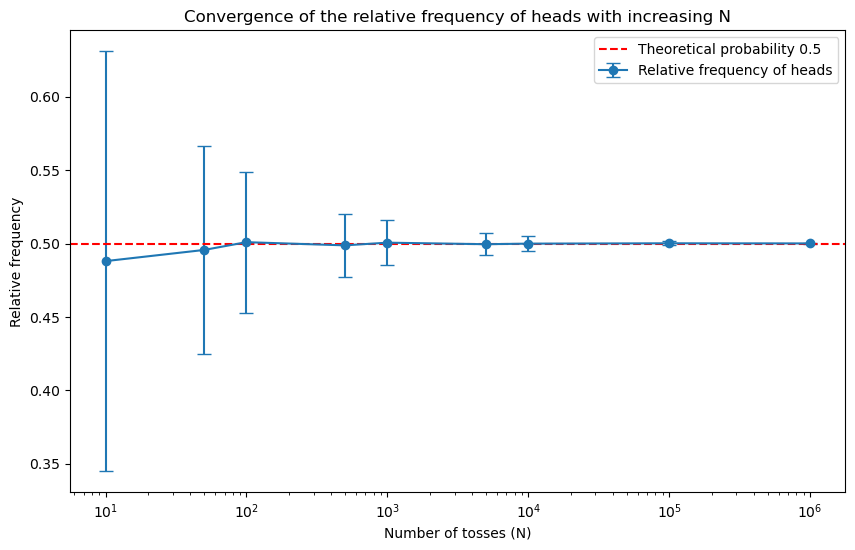

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_coin_tosses(n):
    """
    Generate n coin tosses (0 or 1) with probability 0.5,
    then compute the relative frequency of heads (assuming heads = 0).
    """
    tosses = np.random.choice([0, 1], size=n)
    return np.mean(tosses == 0)

# Experiment parameters
N_values = [10, 50, 100, 500, 1000, 5000, 10000, 100000, 1000000]
repeats = 100  # number of repetitions for each N

# Lists to store results
mean_frequencies = []
std_frequencies = []
min_frequencies = []
max_frequencies = []

# Conduct the experiment
for N in N_values:
    frequencies = [simulate_coin_tosses(N) for _ in range(repeats)]
    mean_frequencies.append(np.mean(frequencies))
    std_frequencies.append(np.std(frequencies))
    min_frequencies.append(np.min(frequencies))
    max_frequencies.append(np.max(frequencies))
    
    # Print results for the current N
    print(f"N = {N}: Mean relative frequency = {np.mean(frequencies):.3f}, "
          f"Probability range = [{np.min(frequencies):.3f}, {np.max(frequencies):.3f}]")

# Visualization
plt.figure(figsize=(10, 6))
plt.errorbar(N_values, mean_frequencies, yerr=std_frequencies, fmt='o-', capsize=5,
             label='Relative frequency of heads')
plt.axhline(0.5, color='red', linestyle='--', label='Theoretical probability 0.5')
plt.xscale('log')
plt.xlabel('Number of tosses (N)')
plt.ylabel('Relative frequency')
plt.title('Convergence of the relative frequency of heads with increasing N')
plt.legend()
plt.show()


Experiment results for different dice types:

4-sided die (theoretical mean = 2.500):
  n_rolls =      1: Empirical Mean = 2.000, Range = [2.000, 2.000]
  n_rolls =      2: Empirical Mean = 2.000, Range = [1.000, 3.000]
  n_rolls =      5: Empirical Mean = 2.600, Range = [2.000, 3.000]
  n_rolls =     10: Empirical Mean = 3.200, Range = [1.000, 4.000]
  n_rolls =     25: Empirical Mean = 2.480, Range = [1.000, 4.000]
  n_rolls =     50: Empirical Mean = 2.620, Range = [1.000, 4.000]
  n_rolls =    100: Empirical Mean = 2.480, Range = [1.000, 4.000]
  n_rolls =    500: Empirical Mean = 2.486, Range = [1.000, 4.000]
  n_rolls =   1000: Empirical Mean = 2.522, Range = [1.000, 4.000]
  n_rolls =   5000: Empirical Mean = 2.527, Range = [1.000, 4.000]
  n_rolls =  10000: Empirical Mean = 2.509, Range = [1.000, 4.000]

6-sided die (theoretical mean = 3.500):
  n_rolls =      1: Empirical Mean = 6.000, Range = [6.000, 6.000]
  n_rolls =      2: Empirical Mean = 4.500, Range = [4.000, 5.000]
  

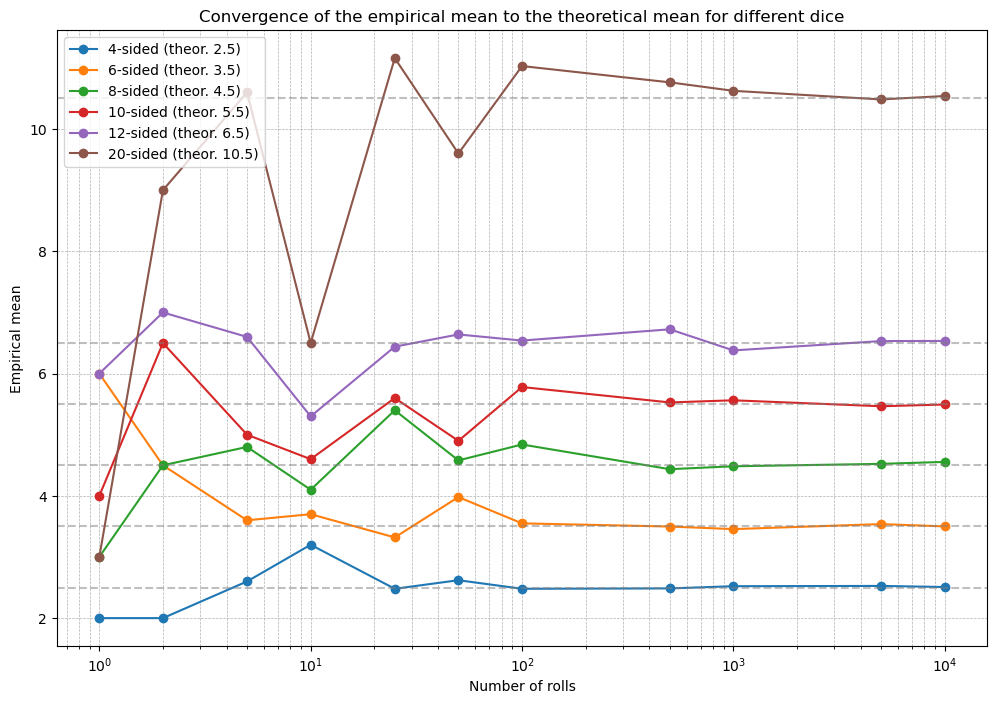

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_die_rolls(n_rolls, sides):
    """
    Generate 'n_rolls' outcomes of a fair die with 'sides' faces (1 to sides).
    Returns the empirical mean of the outcomes, as well as the minimum and maximum values observed.
    """
    outcomes = np.random.randint(1, sides + 1, size=n_rolls)
    return np.mean(outcomes), np.min(outcomes), np.max(outcomes)

# List of dice types: 4-, 6-, 8-, 10-, 12-, and 20-sided
die_types = [4, 6, 8, 10, 12, 20]
# List of the number of rolls to test
n_rolls_values = [1, 2, 5, 10, 25, 50, 100, 500, 1000, 5000, 10000]

# Dictionary to store results: for each die, we keep a list of empirical means and (min, max) ranges
results = {}

print("Experiment results for different dice types:")
for sides in die_types:
    empirical_means = []   # will store the empirical mean for each number of rolls
    ranges = []            # will store (min, max) outcome for each number of rolls
    theoretical_expectation = (sides + 1) / 2  # theoretical mean for this die
    print(f"\n{sides}-sided die (theoretical mean = {theoretical_expectation:.3f}):")
    
    for n in n_rolls_values:
        mean_outcome, min_outcome, max_outcome = simulate_die_rolls(n, sides)
        empirical_means.append(mean_outcome)
        ranges.append((min_outcome, max_outcome))
        print(f"  n_rolls = {n:6}: Empirical Mean = {mean_outcome:.3f}, "
              f"Range = [{min_outcome:.3f}, {max_outcome:.3f}]")
    
    results[sides] = (empirical_means, ranges)

# Visualization of results: plot the empirical mean for each type of die
plt.figure(figsize=(12, 8))
for sides in die_types:
    theoretical_expectation = (sides + 1) / 2
    empirical_means, _ = results[sides]
    plt.plot(n_rolls_values, empirical_means, marker='o',
             label=f"{sides}-sided (theor. {theoretical_expectation:.1f})")
    # Add a horizontal line indicating the theoretical mean
    plt.axhline(theoretical_expectation, linestyle='--', color='gray', alpha=0.5)

plt.xscale('log')
plt.xlabel("Number of rolls")
plt.ylabel("Empirical mean")
plt.title("Convergence of the empirical mean to the theoretical mean for different dice")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()
